In [1]:
import pandas as pd
import os
import seaborn
from datetime import datetime
import time
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pb_only = False # SET TO TRUE TO USE ONLY PERSONAL BEST RECORDS

record_df = pd.DataFrame()
if not pb_only:
    # full record dataset
    record_df = pd.read_csv("out/all_records_pt_1.csv", index_col=[0])
    record_df = pd.concat([record_df, pd.read_csv("out/all_records_pt_2.csv", index_col=[0])], ignore_index=True)
else:
    # pb records only
    record_df = pd.read_csv("out/all_pbs.csv", index_col=[0])
    record_df = record_df.reset_index(drop=True)

# full user dataset
user_df = pd.read_csv("out/all_user_info.csv", index_col=[0])
user_df = user_df.reset_index(drop=True)

users_pb_df = pd.read_csv("out/all_pbs.csv", index_col=[0])
users_pb_df = users_pb_df.reset_index(drop=True)

In [3]:
# Check record_df columns
print("Columns in record_df:", record_df.columns)
print("columns in user_df:", user_df.columns)
print("columns in users_pb_df:", users_pb_df.columns)
print('---')
print(len(record_df))
print(len(user_df))


Columns in record_df: Index(['record_id', 'user_id', 'datetime', 'current_pb', 'once_pb',
       'final_time', 'pps', 'inputs', 'score', 'pieces_placed', 'singles',
       'doubles', 'triples', 'quads', 'all_clears', 'finesse_faults',
       'finesse_perf'],
      dtype='object')
columns in user_df: Index(['id', 'username', 'rank', 'cohort', 'best_time', 'best_record',
       'country', 'created_date', 'xp', 'achievement_rating',
       'TL_games_played', 'TL_games_won', 'TL_play_time', 'num_records'],
      dtype='object')
columns in users_pb_df: Index(['record_id', 'user_id', 'datetime', 'current_pb', 'once_pb',
       'final_time', 'pps', 'inputs', 'score', 'pieces_placed', 'singles',
       'doubles', 'triples', 'quads', 'all_clears', 'finesse_faults',
       'finesse_perf'],
      dtype='object')
---
13121717
1049931


In [4]:
# total playtime for each user
total_time_per_user = record_df.groupby('user_id')['final_time'].sum().reset_index()
total_time_per_user.rename(columns={'user_id': 'id'}, inplace=True)  # Rename for consistency

# Merge total playtime into user_df
user_df = user_df.merge(total_time_per_user, on='id', how='left')
user_df.rename(columns={'final_time': 'total_time_per_user'}, inplace=True)

# Sort user_df by 'best_time' and drop duplicates based on 'user_id'
best_record_df = user_df.sort_values('best_time', ascending=True).drop_duplicates('id', keep='first')

# total_time_per_user -> ms to hours
best_record_df['total_time_per_user'] /= (1000 * 60 * 60)
# best_time -> ms to seconds
best_record_df['best_time'] /= 1000



#print(best_record_df[['id', 'best_time', 'total_time_per_user']].head())

In [5]:
#Cleaning
best_record_df = best_record_df.dropna(subset=['total_time_per_user'])
best_record_df = best_record_df.loc[:, ~best_record_df.columns.duplicated()]


In [6]:
a = user_df[user_df['TL_games_played'] >= 1000]

count = len(a[a['best_time'] <= 30000])
print(count)

1806


In [7]:
#finding specific users
#print(user_df.head())
worst_pb = users_pb_df['final_time'].max()
worst_pb_user = users_pb_df[users_pb_df['final_time'] == worst_pb]
#print(worst_pb_user)

most_games_played = user_df['TL_games_played'].max()
playerMP = user_df[user_df['TL_games_played'] == most_games_played]
print(playerMP)

#print percentage of players that dont do
a = best_record_df[best_record_df['total_time_per_user'] >= 1]
print ("percentage play less than 1/2 an hour:", len(a)/len(best_record_df))

b = best_record_df[best_record_df['best_time'] <= 380]
b = b[b['TL_games_played'] >= 0]
c = b[b['TL_games_played'] <= 0]

print ("percentage less then x TL games with <120 PB:", len(c)/len(b))


                            id        username  rank  cohort  best_time  \
2049  6324570cf9f274cf1998e119  trytogetbetter  2051      28    28480.0   

                   best_record country              created_date  \
2049  66a90d3ba571b238d732b815      DE  2022-09-16T10:59:24.655Z   

                xp  achievement_rating  TL_games_played  TL_games_won  \
2049  3.040499e+07                 122            59552         14216   

      TL_play_time  num_records  total_time_per_user  
2049  1.123380e+07           29            1578220.0  
percentage play less than 1/2 an hour: 0.04085813906578682
percentage less then x TL games with <120 PB: 0.11837315465784487


In [8]:
percentages = {}

# Loop through thresholds from 120 to 0, decrementing by 5
for threshold in range(120, -1, -5):
    count = len(best_record_df[best_record_df['best_time'] <= threshold])
    percentage = count / 2690203 * 100
    percentages[threshold] = percentage

# Print the results
for time, perc in percentages.items():
    print(f"Percentage of players with <= {time} seconds: {perc:.2f}%")

Percentage of players with <= 120 seconds: 15.52%
Percentage of players with <= 115 seconds: 14.11%
Percentage of players with <= 110 seconds: 12.72%
Percentage of players with <= 105 seconds: 11.35%
Percentage of players with <= 100 seconds: 10.04%
Percentage of players with <= 95 seconds: 8.75%
Percentage of players with <= 90 seconds: 7.53%
Percentage of players with <= 85 seconds: 6.38%
Percentage of players with <= 80 seconds: 5.29%
Percentage of players with <= 75 seconds: 4.29%
Percentage of players with <= 70 seconds: 3.40%
Percentage of players with <= 65 seconds: 2.62%
Percentage of players with <= 60 seconds: 1.99%
Percentage of players with <= 55 seconds: 1.42%
Percentage of players with <= 50 seconds: 1.01%
Percentage of players with <= 45 seconds: 0.67%
Percentage of players with <= 40 seconds: 0.42%
Percentage of players with <= 35 seconds: 0.23%
Percentage of players with <= 30 seconds: 0.10%
Percentage of players with <= 25 seconds: 0.03%
Percentage of players with <= 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


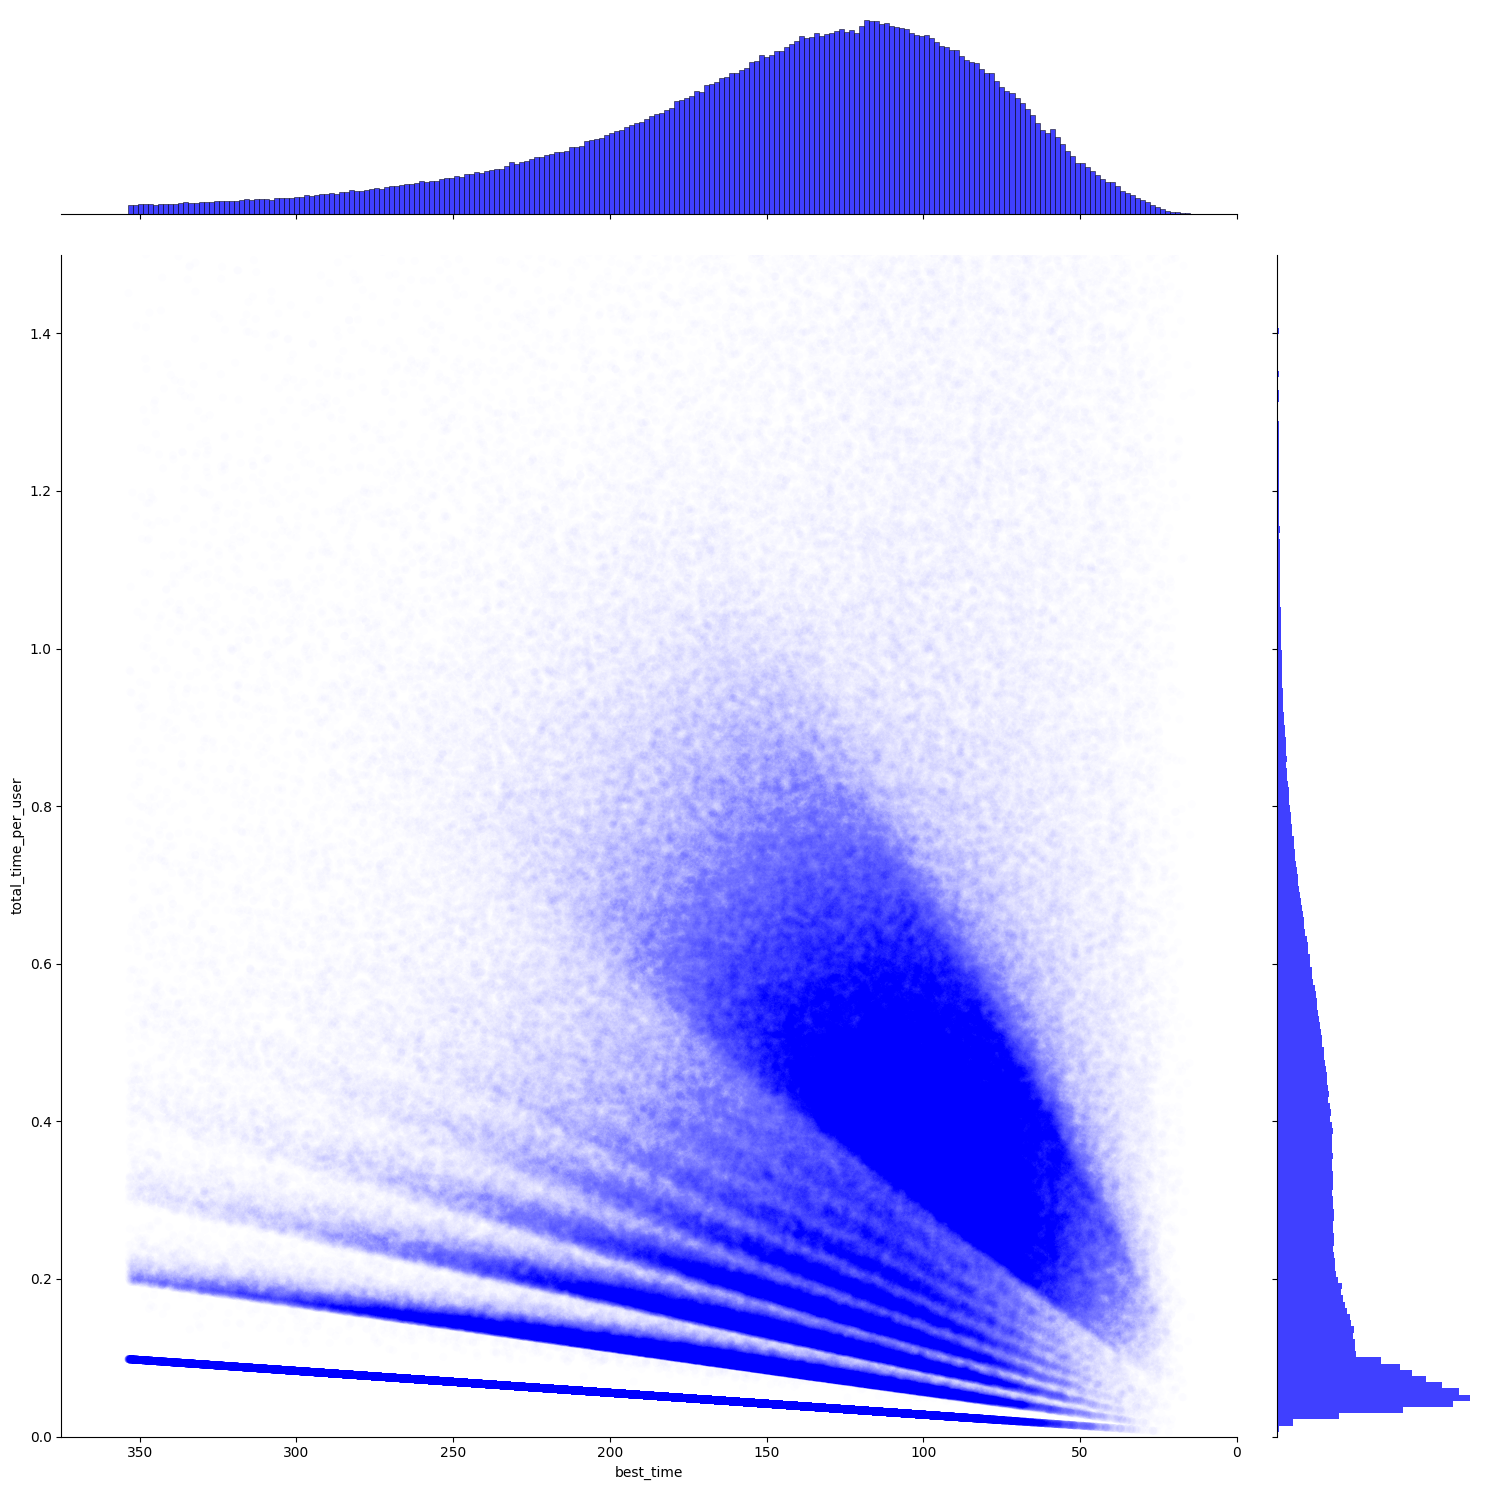

In [9]:
filtered_df = best_record_df[best_record_df['total_time_per_user'] <= 3.5]


g = seaborn.jointplot(
    x='best_time', y='total_time_per_user', 
    data=best_record_df, 
    kind='scatter',  # Change between 'hex' and 'scatter'
    height=15, 
    color = "blue",
    alpha = 0.009,
    cmap='plasma'
    #,gridsize=100  # Decrease to make larger, increase for more granularity
)

g.ax_joint.set_xlim(left=0, right=375)  # right limit of x 
g.ax_joint.set_ylim(bottom=0, top=1.5)  # upper limit of y
g.ax_joint.collections[0].set_edgecolor('none')

#plt.suptitle('Total Time vs Personal Best Time')
plt.gca().invert_xaxis()
plt.show()

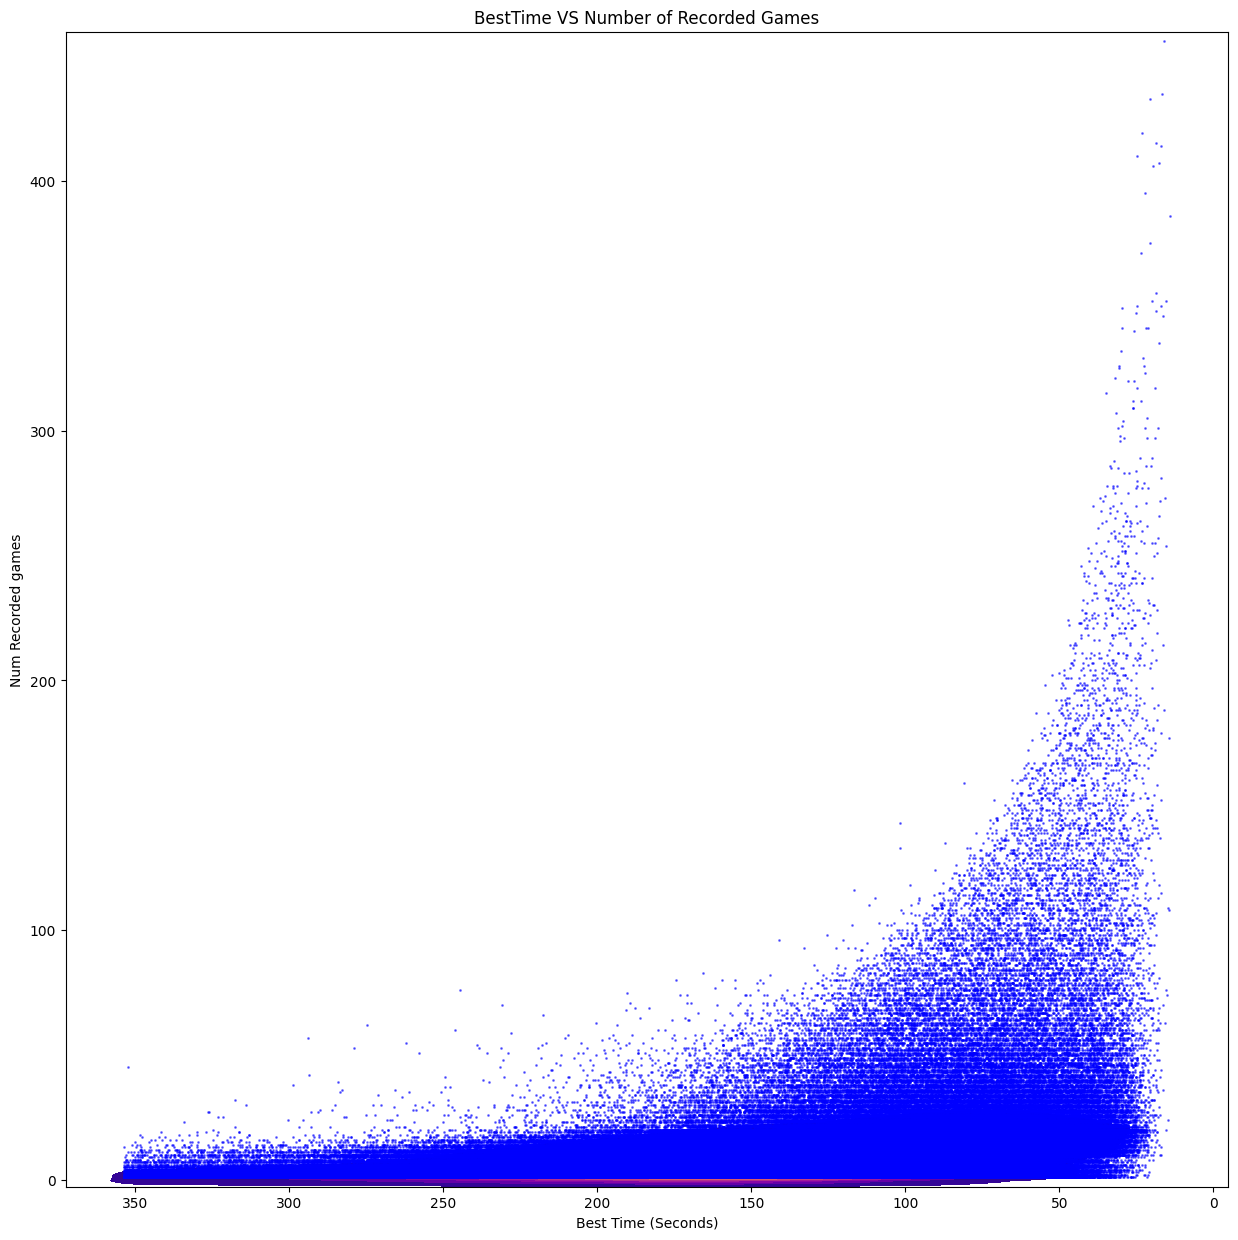

In [10]:

filtered_df = filtered_df[filtered_df['num_records'] <= 10000]

# Scatter plot with density color overlay
plt.figure(figsize=(15, 15))
seaborn.kdeplot(
    x=filtered_df['best_time'], 
    y=filtered_df['num_records'], 
    cmap="plasma", 
    fill=True
)
plt.scatter(filtered_df['best_time'], filtered_df['num_records'], s=1, alpha=0.5, color='blue')
plt.title('BestTime VS Number of Recorded Games')
plt.xlabel('Best Time (Seconds)')
plt.ylabel('Num Recorded games')
plt.gca().invert_xaxis()
plt.show()

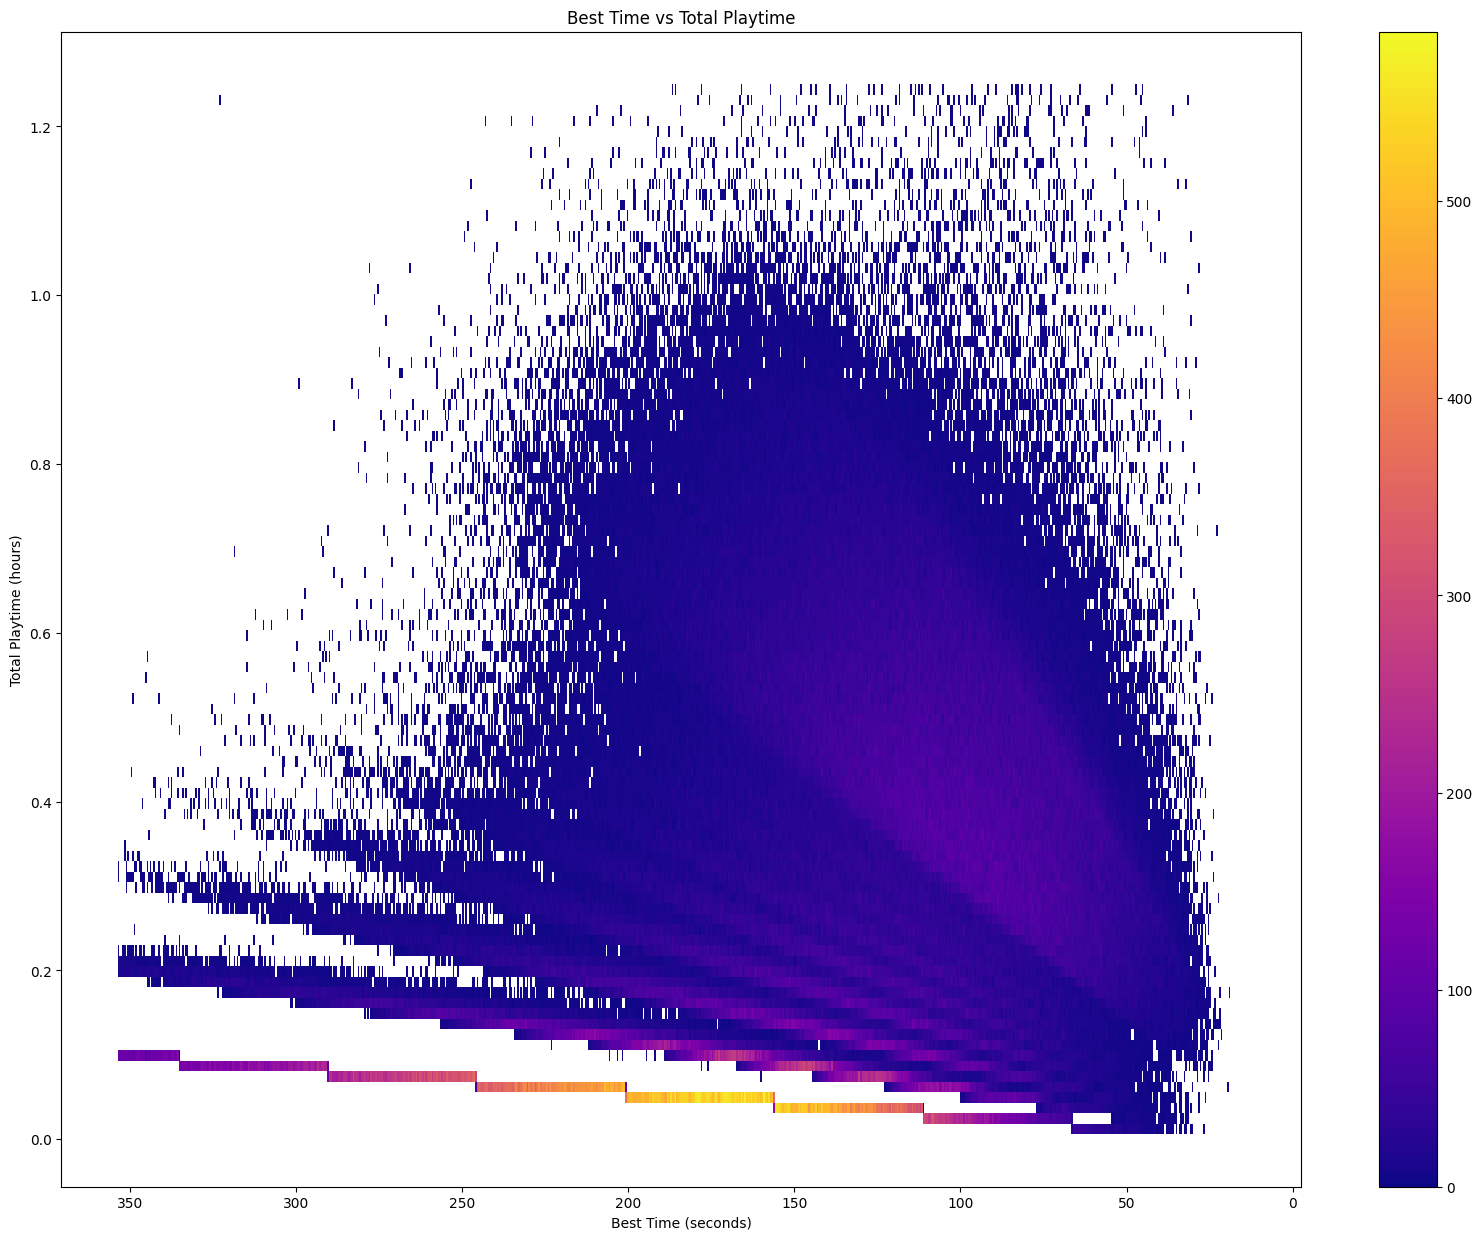

In [11]:
filtered_df = best_record_df[best_record_df['total_time_per_user'] <= 1.25]

# Create a 2D histogram heatmap (Hexbin style)
plt.figure(figsize=(20, 15))
g = seaborn.histplot(
    data=filtered_df,
    x='best_time', 
    y='total_time_per_user',
    bins=[700, 100],  # Number of bins for the 2D histogram
    pthresh=.01,  # Optional: Apply a threshold for the plot intensity
    cmap='plasma',  # Color map
    cbar=True,  # Add a color bar
    fill=True,  # Fill the bins
)

# Customize the title and labels
plt.title('Best Time vs Total Playtime')
plt.xlabel('Best Time (seconds)')
plt.ylabel('Total Playtime (hours)')

plt.gca().invert_xaxis()
# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


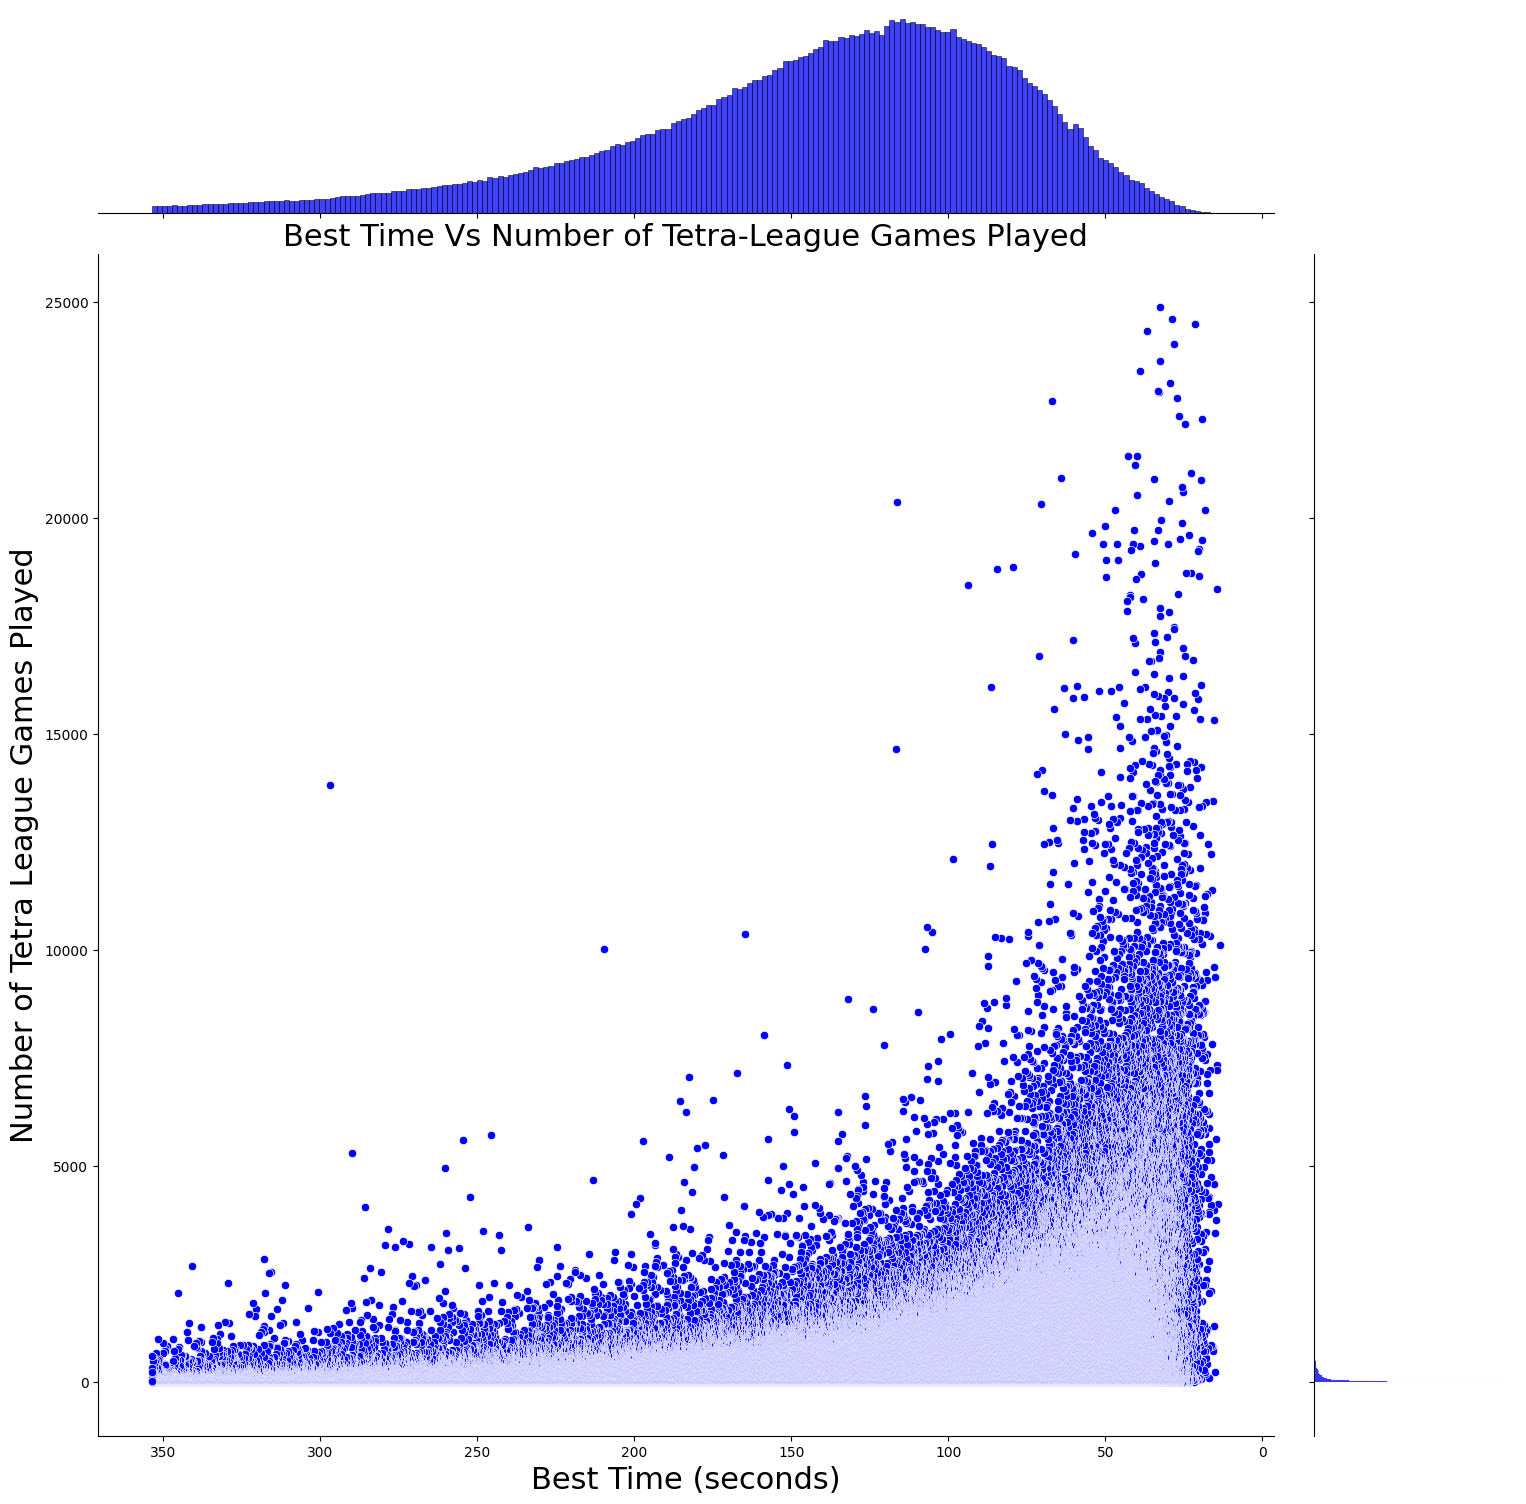

In [12]:
filtered_df = best_record_df[best_record_df['TL_games_played'] <= 30000]
filtered_df = filtered_df[filtered_df['TL_games_played'] > 0]
filtered_df = filtered_df[filtered_df['TL_games_played'] < 25000]
filtered_df = filtered_df.dropna(subset=['TL_play_time'] )
filtered_df = filtered_df.dropna(subset=['TL_games_played'])

g = seaborn.jointplot(
    x='best_time', y='TL_games_played', 
    data=filtered_df, 
    kind='scatter',  # Change between 'hex' and 'scatter'
    height=15, 
    color = "blue",

    cmap='plasma'
    #,gridsize=100  # Decrease to make larger, increase for more granularity
)

#g.ax_joint.set_xlim(left=0, right=375)  # right limit of x 
#g.ax_joint.set_ylim(bottom=0, top=1.5)  # upper limit of y
#g.ax_joint.collections[0].set_edgecolor('none')

plt.title('Best Time Vs Number of Tetra-League Games Played', fontsize=22)
plt.xlabel('Best Time (seconds)', fontsize=22)
plt.ylabel('Number of Tetra League Games Played', fontsize=22)
plt.gca().invert_xaxis()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


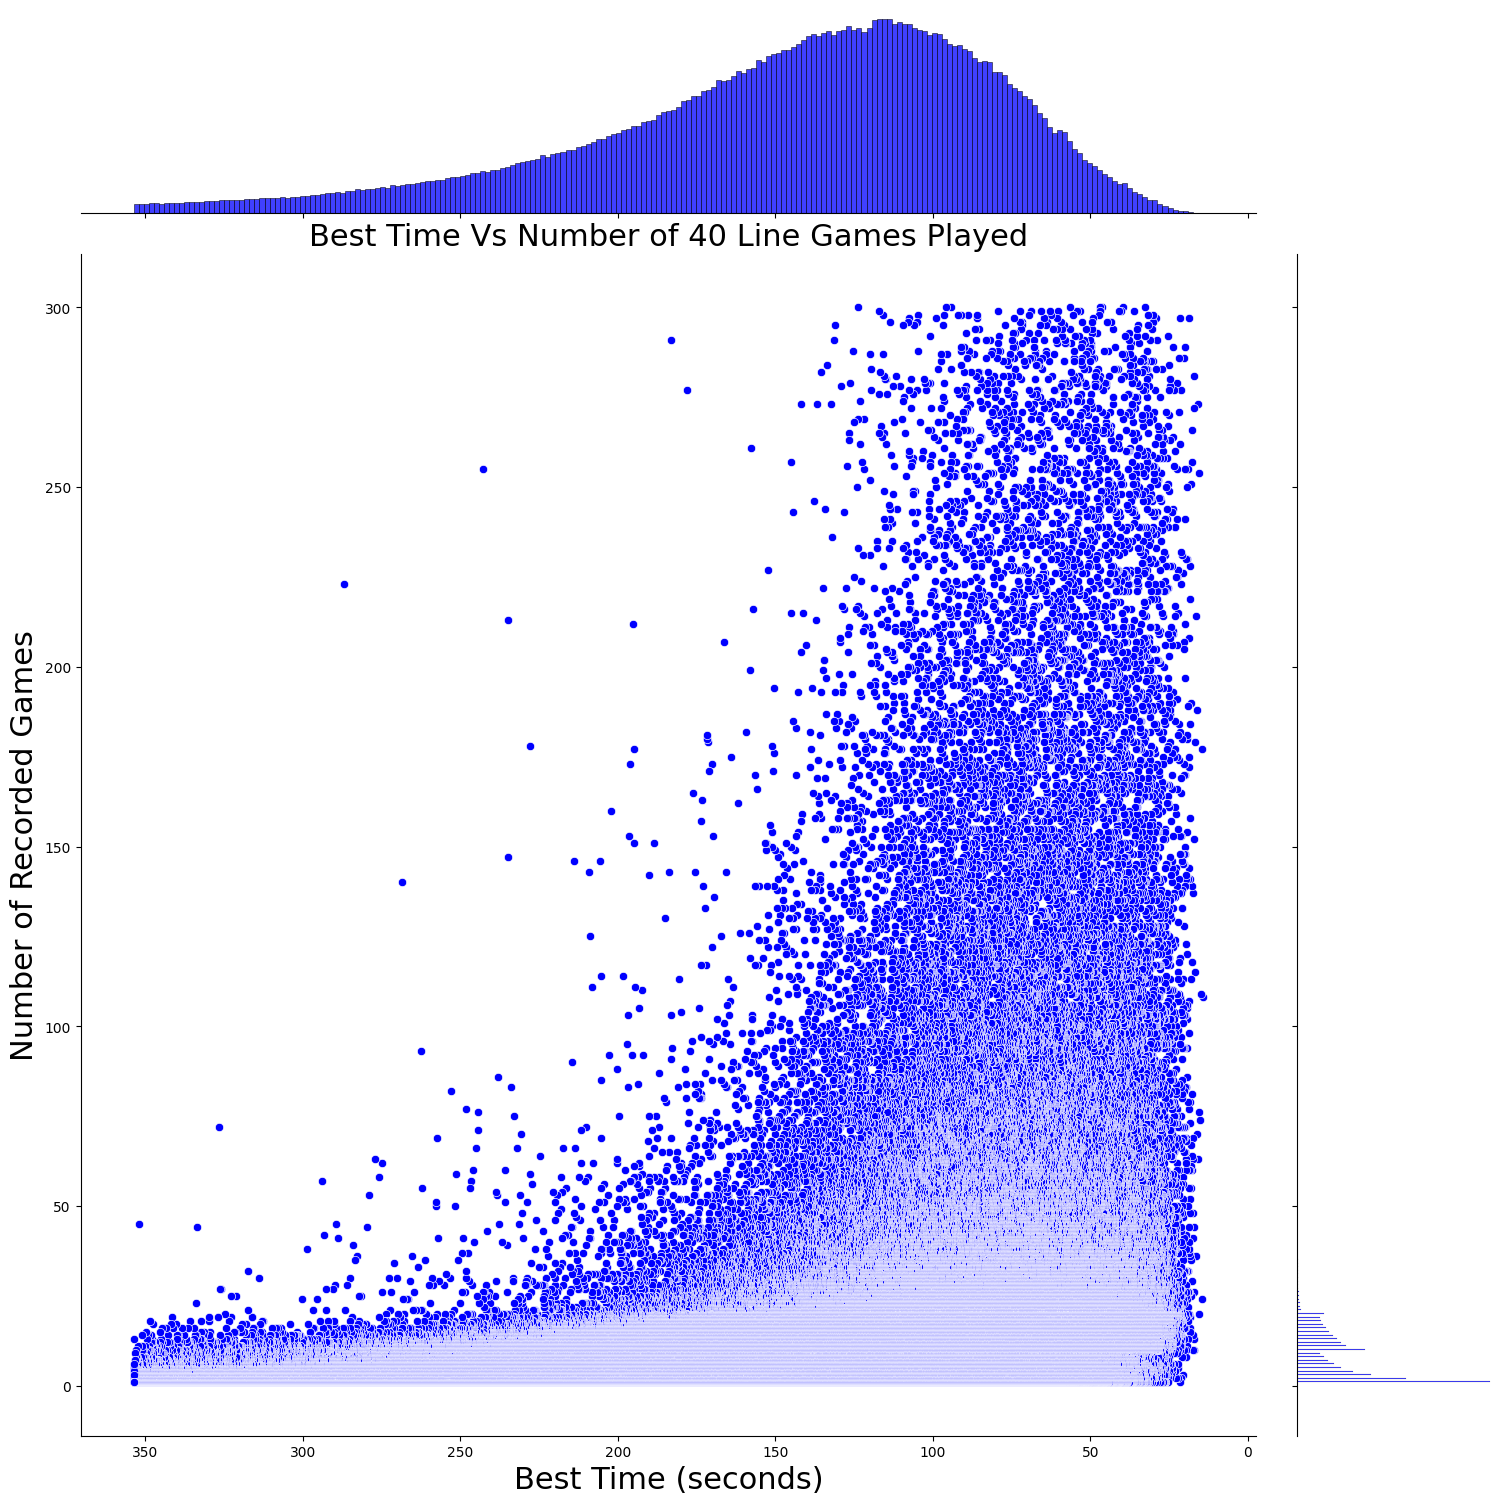

In [16]:
filtered_df = best_record_df[best_record_df['num_records'] <= 300]


g = seaborn.jointplot(
    x='best_time', y='num_records', 
    data=filtered_df, 
    kind='scatter',  # Change between 'hex' and 'scatter'
    height=15, 
    color = "blue",

    cmap='plasma'
    #,gridsize=100  # Decrease to make larger, increase for more granularity
)

#g.ax_joint.set_xlim(left=0, right=375)  # right limit of x 
#g.ax_joint.set_ylim(bottom=0, top=1.5)  # upper limit of y
#g.ax_joint.collections[0].set_edgecolor('none')

plt.title('Best Time Vs Number of 40 Line Games Played', fontsize=22)
plt.xlabel('Best Time (seconds)', fontsize=22)
plt.ylabel('Number of Recorded Games', fontsize=22)
plt.gca().invert_xaxis()
plt.show()